<a href="https://colab.research.google.com/github/hchang18/non-parametric-methods/blob/main/kernel_density_estimator_optimal_bandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kernel Density Estimator
### STAT 580 Non parametric methods (Spring 2021) 
### Homework 2

Haeyoon

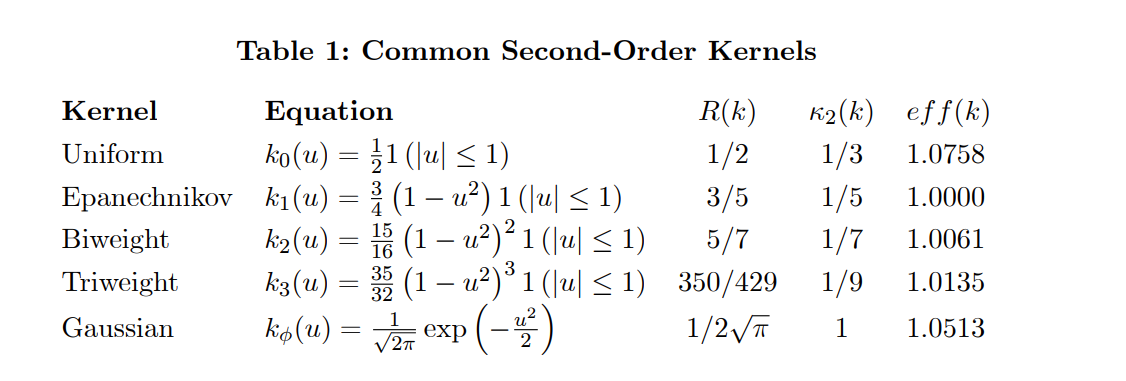

Reference: 
- http://www.jtrive.com/kernel-density-estimation-in-python.html
- https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
- https://www.ssc.wisc.edu/~bhansen/718/NonParametrics1.pdf

In [ ]:
# ===================================================
# kde_pdf and kde_cdf are used for compiling kernel |
# density and distribution estimates.               |
# ===================================================

def kde_pdf(data, kernel_func, bandwidth):
    """Generate kernel density estimator over data."""
    kernels = dict()
    n = len(data)
    for d in data:
        kernels[d] = kernel_func(d, bandwidth)
    def evaluate(x):
        """Evaluate `x` using kernels above."""
        pdfs = list()
        for d in data: 
            pdfs.append(kernels[d](x))
        return(sum(pdfs)/n)
    return(evaluate)

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
from scipy.stats import norm, expon

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

sns.set(color_codes=True)
plt.rcParams["figure.figsize"] = (15,10)

# =========================================
# kernel density estimates visualizations |
# =========================================
def plot_kde(true_dist, num_samples, kernel_function, bandwidth_h):

    vals = np.array([])

    if true_dist == 'exp':
        vals = np.random.exponential(1, num_samples)
    elif true_dist == 'norm':
        vals = np.random.normal(0, 1, num_samples)

    xvals = np.arange(min(vals), max(vals), .01)


    # ========================================================
    # Bandwidth Selection : rule-of-thumb plugin             |
    # ========================================================
    # bandwidth estimation based on kernel function

    if "uniform_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 1/2
        kappa_2 = 1/3
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 
    
    elif "epanechnikov_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 3/5
        kappa_2 = 1/5
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 
    
    elif "gaussian_pdf" in str(kernel_function):
        sigma_hat = np.std(vals)
        R_k = 1 / (2 * (np.pi**0.5))
        kappa_2 = 1
        h_opt = (((8 * (np.pi**0.5) * R_k) / (3 * kappa_2 * num_samples))**0.2) * sigma_hat 

    # ========================================================
    # Bandwidth Selection : cross-validation                 |
    # ========================================================
    grid = GridSearchCV(KernelDensity(), {'bandwidth': xvals}, cv=20)
    grid.fit(vals[:, None])
    h_cv = grid.best_params_["bandwidth"]


    # ========================================================
    # Random Bandwidth visualization                         |
    # ========================================================

    # fig = plt.figure()

    # # bandwidth=1:
    # ax1 = fig.add_subplot(2, 2, 1)
    # dist_1 = kde_pdf(data=vals, kernel_func=kernel_function, bandwidth=bandwidth_h[0])
    # y1 = [dist_1(i) for i in xvals]
    # ys1 = [dist_1(i) for i in vals]
    # ax1.scatter(vals, ys1)
    # if true_dist == 'exp':
    #     ax1.plot(xvals, expon.pdf(xvals))
    # elif true_dist == 'norm':
    #     ax1.plot(xvals, norm.pdf(xvals, 0, 1))
    # ax1.plot(xvals, y1)

    # # bandwidth=2:
    # ax2 = fig.add_subplot(2, 2, 2)
    # dist_2 = kde_pdf(data=vals, kernel_func=kernel_function, bandwidth=bandwidth_h[1])
    # y2 = [dist_2(i) for i in xvals]
    # ys2 = [dist_2(i) for i in vals]
    # ax2.scatter(vals, ys2)
    # if true_dist == 'exp':
    #     ax2.plot(xvals, expon.pdf(xvals))
    # elif true_dist == 'norm':
    #     ax2.plot(xvals, norm.pdf(xvals, 0, 1))
    # ax2.plot(xvals, y2)

    # # bandwidth=3:
    # ax3 = fig.add_subplot(2, 2, 3)
    # dist_3 = kde_pdf(vals, kernel_func=kernel_function, bandwidth=bandwidth_h[2])
    # y3 = [dist_3(i) for i in xvals]
    # ys3 = [dist_3(i) for i in vals]
    # ax3.scatter(vals, ys3)
    # if true_dist == 'exp':
    #     ax3.plot(xvals, expon.pdf(xvals))
    # elif true_dist == 'norm':
    #     ax3.plot(xvals, norm.pdf(xvals, 0, 1))
    # ax3.plot(xvals, y3)

    # # display gridlines 
    # g1 = ax1.grid(True)
    # g2 = ax2.grid(True)
    # g3 = ax3.grid(True)

    # # display legend in each subplot
    # leg1 = mpatches.Patch(color=None, label=f'bandwidth={bandwidth_h[0]}')
    # leg2 = mpatches.Patch(color=None, label=f'bandwidth={bandwidth_h[1]}')
    # leg3 = mpatches.Patch(color=None, label=f'bandwidth={bandwidth_h[2]}')

    # ax1.legend(handles=[leg1])
    # ax2.legend(handles=[leg2])
    # ax3.legend(handles=[leg3])

    # plt.tight_layout()
    # plt.show()


    # ========================================================
    # Optimized Bandwidth visualization                      |
    # ========================================================

    fig = plt.figure()

    # bandwidth=optimal_bandwidth_plugin:
    ax4 = fig.add_subplot(2, 2, 1)
    dist_4 = kde_pdf(vals, kernel_func=kernel_function, bandwidth=h_opt)
    y4 = [dist_4(i) for i in xvals]
    ys4 = [dist_4(i) for i in vals]
    ax4.scatter(vals, ys4)
    if true_dist == 'exp':
        ax4.plot(xvals, expon.pdf(xvals))
    elif true_dist == 'norm':
        ax4.plot(xvals, norm.pdf(xvals, 0, 1))
    ax4.plot(xvals, y4)

    # bandwidth=optimal_bandwidth_crossvalidated:
    ax5 = fig.add_subplot(2, 2, 2)
    dist_5 = kde_pdf(vals, kernel_func=kernel_function, bandwidth=h_cv)
    y5 = [dist_5(i) for i in xvals]
    ys5 = [dist_5(i) for i in vals]
    ax5.scatter(vals, ys5)
    if true_dist == 'exp':
        ax5.plot(xvals, expon.pdf(xvals))
    elif true_dist == 'norm':
        ax5.plot(xvals, norm.pdf(xvals, 0, 1))
    ax5.plot(xvals, y5)

    # display gridlines 
    g4 = ax4.grid(True)
    g5 = ax5.grid(True)

    # display legend in each subplot
    leg4 = mpatches.Patch(color=None, label=f'plug-in bandwidth={h_opt}')
    leg5 = mpatches.Patch(color=None, label=f'cross-validated bandwidth={h_cv}')

    ax4.legend(handles=[leg4])
    ax5.legend(handles=[leg5])

    plt.tight_layout()
    plt.show()

In [ ]:
# ============================================
# Uniform Kernel PDF                         |
# ============================================

def uniform_pdf(x_i, bandwidth):
    """Return uniform kernel density estimator."""
    lowerb = (x_i - bandwidth)
    upperb = (x_i + bandwidth)
    def evaluate(x):
        """Evaluate x."""
        if  x<=lowerb: pdf=0
        elif x>upperb: pdf=0
        else: pdf=(1/(2*bandwidth))
        return(pdf)
    return(evaluate)

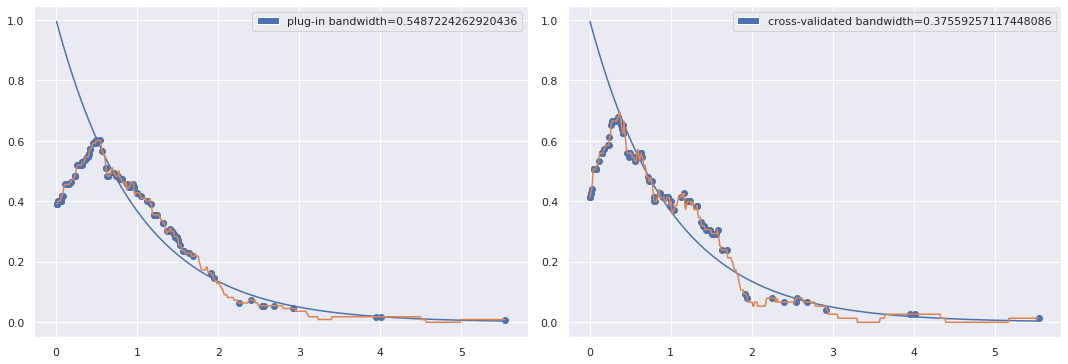

In [ ]:
plot_kde(true_dist='exp', num_samples=100, kernel_function=uniform_pdf, bandwidth_h=[0.1, 0.4, 1])

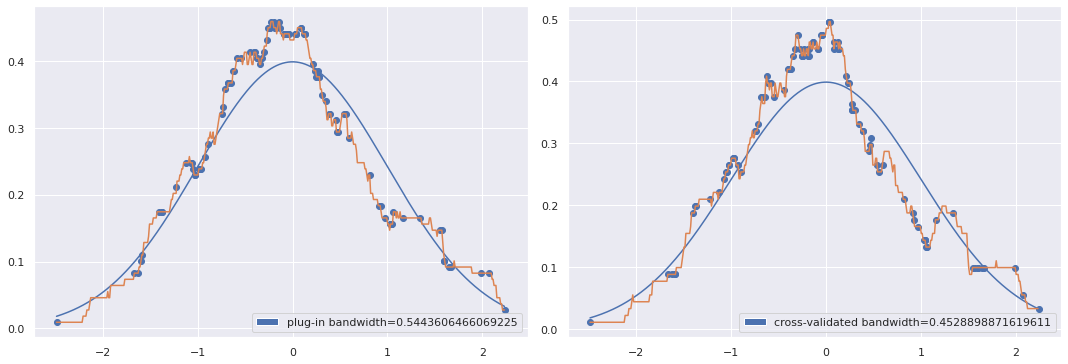

In [ ]:
plot_kde(true_dist='norm', num_samples=100, kernel_function=uniform_pdf, bandwidth_h=[0.1, 0.4, 1])

In [ ]:
# ============================================
# Epanechnikov Kernel PDF                      |
# ============================================

def epanechnikov_pdf(x_i, bandwidth):
    """Return epanechnikov kernel density estimator."""
    lowerb = (x_i - bandwidth)
    upperb = (x_i + bandwidth)
    def evaluate(x):
        """Evaluate x."""
        if  x <= lowerb: pdf=0
        elif x > upperb: pdf=0
        else: pdf = ((3*(bandwidth**2-(x-x_i)**2))/(4*bandwidth**3))
        return (pdf)
    return (evaluate)

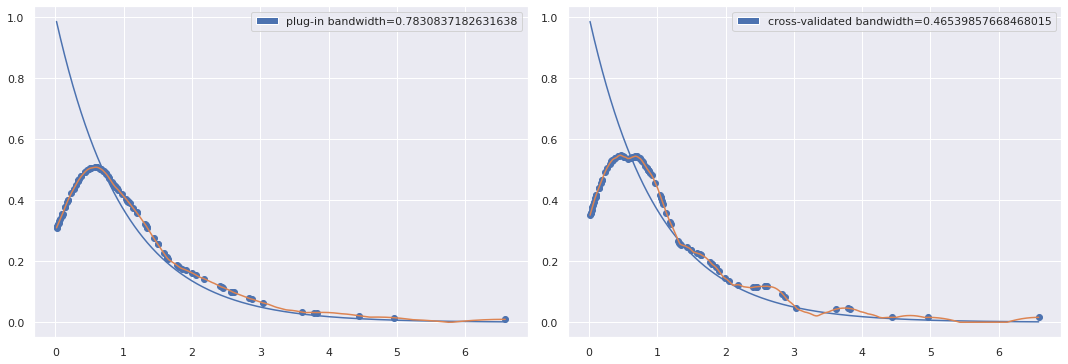

In [ ]:
plot_kde(true_dist='exp', num_samples=100, kernel_function=epanechnikov_pdf, bandwidth_h=[0.1, 0.4, 1])

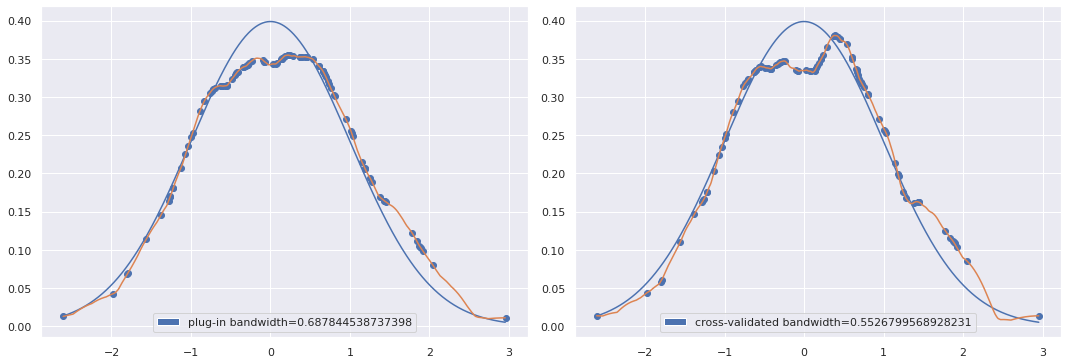

In [ ]:
plot_kde(true_dist='norm', num_samples=100, kernel_function=epanechnikov_pdf, bandwidth_h=[0.1, 0.4, 1])

In [ ]:
# ============================================
# Gaussian Kernel PDF                        |
# ============================================
import numpy as np


def gaussian_pdf(x_i, bandwidth):
    """Return Gaussian kernel density estimator."""
    x_bar  = x_i
    def evaluate(x):
        """Evaluate x."""
        pdf = (np.sqrt(2*np.pi*bandwidth**2)**-1) * np.exp(-((x - x_bar)**2)/(2*bandwidth**2))
        return(pdf)
    return(evaluate)

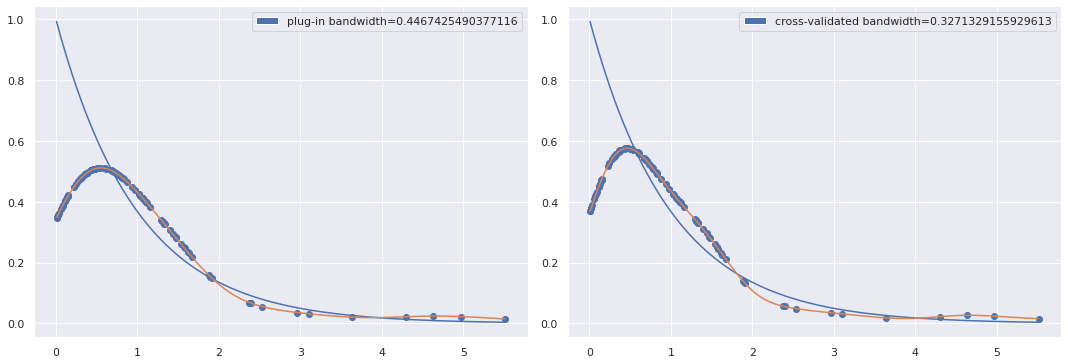

In [ ]:
plot_kde(true_dist='exp', num_samples=100, kernel_function=gaussian_pdf, bandwidth_h=[0.1, 0.4, 1])

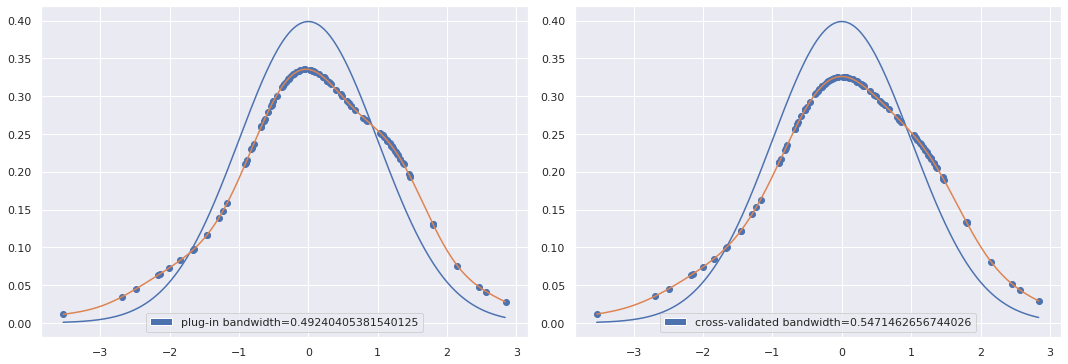

In [ ]:
plot_kde(true_dist='norm', num_samples=100, kernel_function=gaussian_pdf, bandwidth_h=[0.1, 0.4, 1])